In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

### DNP3 Data

In [2]:
def load_csv_files(all_files: list[Path]) -> pd.DataFrame:
    """
    Load all CSV files into a single DataFrame.
    """
    if len(all_files) == 0:
        logger.warning("No CSV files found.")
        return pd.DataFrame()
    dataframes = []
    for file in all_files:
        logger.info(f"Loading {file}")

        df = pd.read_csv(file, low_memory=False)
        if "Label" in df.columns:
            if "No Label" in df["Label"].unique():
                del df["Label"]
        df.columns = [c.strip() for c in df.columns]
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df


data_root = Path(r"E:\MSc Works\IDS\data\Custom_DNP3_Parser")
logger.info(f"Data root: {data_root}")
all_files = list(data_root.glob("*.csv"))
logger.info(f"Found {len(all_files)} files in {data_root}")

dnp3_df = load_csv_files(all_files)
logger.info(f"Combined dnp3_df shape: {dnp3_df.shape}")
dnp3_df.firstPacketDIR = dnp3_df["firstPacketDIR"].apply(
    lambda x: 1 if x == "MASTER" else 0
)

2025-05-18 13:02:52.956 | INFO     | __main__:<module>:23 - Data root: E:\MSc Works\IDS\data\Custom_DNP3_Parser
2025-05-18 13:02:52.966 | INFO     | __main__:<module>:25 - Found 71 files in E:\MSc Works\IDS\data\Custom_DNP3_Parser
2025-05-18 13:02:52.968 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\Custom_DNP3_Parser\20200508_DNP3_Disable_Unsolicited_Messages_Attack_UOWM_DNP3_Dataset_Slave_05.pcapDNP3_FLOWLABELED.csv
2025-05-18 13:02:52.987 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\Custom_DNP3_Parser\20200514_Disable_Unsolicited_Messages_Attack_UOWM_DNP3_Dataset_Attacker_01.pcapDNP3_FLOWLABELED.csv
2025-05-18 13:02:53.012 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\Custom_DNP3_Parser\20200514_Disable_Unsolicited_Messages_Attack_UOWM_DNP3_Dataset_Attacker_02.pcapDNP3_FLOWLABELED.csv
2025-05-18 13:02:53.036 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\Custom_DNP3_Parser\2020051

In [3]:
ignore_columns = [
    "File",
    "flow ID",
    "binary_label",
    "Timestamp",
    "source IP",
    "destination IP",
    "date",
    "Unnamed: 0",
    "Unnamed: 0.1",
]
dnp3_df = dnp3_df[[c for c in dnp3_df.columns if c not in ignore_columns]]

### CICFlowData

In [4]:
data_root = Path(r"E:\MSc Works\IDS\data\CICFlowMeter")
logger.info(f"Data root: {data_root}")
all_files = list(data_root.glob("*.csv"))
logger.info(f"Found {len(all_files)} files in {data_root}")
cicflow_df = load_csv_files(all_files)
logger.info(f"Combined cicflow_df shape: {cicflow_df.shape}")

valid_cols = [
    "Src Port",
    "Dst Port",
    "Protocol",
    "Flow Duration",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "TotLen Fwd Pkts",
    "TotLen Bwd Pkts",
    "Fwd Pkt Len Max",
    "Fwd Pkt Len Min",
    "Fwd Pkt Len Mean",
    "Fwd Pkt Len Std",
    "Bwd Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Mean",
    "Bwd Pkt Len Std",
    "Flow Byts/s",
    "Flow Pkts/s",
    "Flow IAT Mean",
    "Flow IAT Std",
    "Flow IAT Max",
    "Flow IAT Min",
    "Fwd IAT Tot",
    "Fwd IAT Mean",
    "Fwd IAT Std",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Bwd IAT Tot",
    "Bwd IAT Mean",
    "Bwd IAT Std",
    "Bwd IAT Max",
    "Bwd IAT Min",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "Fwd Header Len",
    "Bwd Header Len",
    "Fwd Pkts/s",
    "Bwd Pkts/s",
    "Pkt Len Min",
    "Pkt Len Max",
    "Pkt Len Mean",
    "Pkt Len Std",
    "Pkt Len Var",
    "FIN Flag Cnt",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "PSH Flag Cnt",
    "ACK Flag Cnt",
    "URG Flag Cnt",
    "CWE Flag Count",
    "ECE Flag Cnt",
    "Down/Up Ratio",
    "Pkt Size Avg",
    "Fwd Seg Size Avg",
    "Bwd Seg Size Avg",
    "Fwd Byts/b Avg",
    "Fwd Pkts/b Avg",
    "Fwd Blk Rate Avg",
    "Bwd Byts/b Avg",
    "Bwd Pkts/b Avg",
    "Bwd Blk Rate Avg",
    "Subflow Fwd Pkts",
    "Subflow Fwd Byts",
    "Subflow Bwd Pkts",
    "Subflow Bwd Byts",
    "Init Fwd Win Byts",
    "Init Bwd Win Byts",
    "Fwd Act Data Pkts",
    "Fwd Seg Size Min",
    "Active Mean",
    "Active Std",
    "Active Max",
    "Active Min",
    "Idle Mean",
    "Idle Std",
    "Idle Max",
    "Idle Min",
    "Label",
]

# get columns with values smaller than 0 if the value is numerical else 0
neg_cols = []
for col in cicflow_df.columns:
    if cicflow_df[col].dtype == "float64" or cicflow_df[col].dtype == "int64":
        if (cicflow_df[col] < 0).any():
            neg_cols.append(col)

# filter df with only neg cols and neg rows
neg_df = cicflow_df[neg_cols]
neg_df = neg_df[neg_df < 0]

# get columns with values infinity
inf_cols = []

for col in cicflow_df.columns:
    if cicflow_df[col].dtype == "float64" or cicflow_df[col].dtype == "int64":
        if (cicflow_df[col] == float("inf")).any():
            inf_cols.append(col)

numerical_df = cicflow_df[
    [c for c in valid_cols if c not in neg_cols and c not in inf_cols]
]

2025-05-18 13:02:54.267 | INFO     | __main__:<module>:2 - Data root: E:\MSc Works\IDS\data\CICFlowMeter
2025-05-18 13:02:54.279 | INFO     | __main__:<module>:4 - Found 78 files in E:\MSc Works\IDS\data\CICFlowMeter
2025-05-18 13:02:54.280 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\CICFlowMeter\20200514_DNP3_Disable_Unsolicited_Messages_Attack_UOWM_DNP3_Dataset_Attacker_01.pcap_FlowLABELED.csv
2025-05-18 13:02:54.300 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\CICFlowMeter\20200514_DNP3_Disable_Unsolicited_Messages_Attack_UOWM_DNP3_Dataset_Attacker_02.pcap_FlowLABELED.csv
2025-05-18 13:02:54.319 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\CICFlowMeter\20200514_DNP3_Disable_Unsolicited_Messages_Attack_UOWM_DNP3_Dataset_Attacker_03.pcap_FlowLABELED.csv
2025-05-18 13:02:54.337 | INFO     | __main__:load_csv_files:10 - Loading E:\MSc Works\IDS\data\CICFlowMeter\20200514_DNP3_Disable_Unsolicited_Messages_A

### Sampling

In [5]:
def oversample_class(df: pd.DataFrame, label: str) -> pd.DataFrame:
    """
    Oversample the specified class in the DataFrame.
    """
    logger.info(f"Before oversampling: {df[label].value_counts()}")
    label_counts = df[label].value_counts()
    max_count = label_counts.max()
    for lbl in label_counts.index:
        count = label_counts[lbl]
        if count < max_count:
            needed = max_count - count
            logger.info(f"Label {lbl} needs {needed} samples")
            oversample_df = df[df[label] == lbl].sample(needed, replace=True)
            df = pd.concat([df, oversample_df], ignore_index=True)

    # Shuffle the DataFrame
    df = df.sample(frac=1, random_state=42, replace=False).reset_index(drop=True)
    logger.info(f"After oversampling: {df[label].value_counts()}")
    return df


def undersample_class(df: pd.DataFrame, label: str) -> pd.DataFrame:
    """
    Undersample the specified class in the DataFrame.
    """
    logger.info(f"Before undersampling: {df[label].value_counts()}")
    label_counts = df[label].value_counts()
    min_count = label_counts.min()
    for lbl in label_counts.index:
        count = label_counts[lbl]
        if count > min_count:
            needed = count - min_count
            logger.info(f"Label {lbl} needs to be reduced by {needed} samples")
            undersample_df = df[df[label] == lbl].sample(needed, replace=False)
            df = df.drop(undersample_df.index)

    # Shuffle the DataFrame
    df = df.sample(frac=1, random_state=42, replace=False).reset_index(drop=True)
    logger.info(f"After undersampling: {df[label].value_counts()}")
    return df


# clf_df = dnp3_df.query('Label!="NORMAL"').copy()
# det_df = dnp3_df.copy()
# det_df["Label"] = det_df["Label"].apply(
#     lambda x: "NORMAL" if x == "NORMAL" else "MALICIOUS"
# )
# logger.info(f"clf_df shape: {clf_df.shape}")
# logger.info(f"det_df shape: {det_df.shape}")

# clf_df = oversample_class(clf_df, "Label")
# det_df = oversample_class(det_df, "Label")
# # det_df = undersample_class(det_df, "Label")

### Attack Detection

In [6]:
# import minmax and train Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


def train_attack_detection(det_df: pd.DataFrame) -> None:
    """
    Train a Random Forest classifier for attack detection.
    """

    scaler = MinMaxScaler()
    features = det_df.drop(columns=["Label"])
    labels = det_df["Label"]
    X = scaler.fit_transform(features)
    y = labels.values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    clf = RandomForestClassifier(
        n_jobs=-1,
    )
    clf.fit(X_train, y_train)
    logger.info("Random Forest Classifier trained.")
    # test score

    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    logger.info(f"F1 Score: {f1}")
    logger.info(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    # logger.info(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    # logger.info(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


for df in [dnp3_df, numerical_df]:
    det_df = df.copy()
    det_df["Label"] = det_df["Label"].apply(
        lambda x: "NORMAL" if x == "NORMAL" else "MALICIOUS"
    )
    logger.info(f"det_df shape: {det_df.shape}")
    train_attack_detection(det_df)

2025-05-18 13:02:56.262 | INFO     | __main__:<module>:43 - det_df shape: (40420, 97)
2025-05-18 13:02:57.466 | INFO     | __main__:train_attack_detection:27 - Random Forest Classifier trained.
2025-05-18 13:02:57.541 | INFO     | __main__:train_attack_detection:32 - F1 Score: 0.9971547630272686
2025-05-18 13:02:57.549 | INFO     | __main__:train_attack_detection:33 - Accuracy: 0.9971548738248391
2025-05-18 13:02:57.603 | INFO     | __main__:<module>:43 - det_df shape: (41768, 76)
2025-05-18 13:02:58.673 | INFO     | __main__:train_attack_detection:27 - Random Forest Classifier trained.
2025-05-18 13:02:58.749 | INFO     | __main__:train_attack_detection:32 - F1 Score: 0.9974859409626239
2025-05-18 13:02:58.761 | INFO     | __main__:train_attack_detection:33 - Accuracy: 0.9974862341393345


### Recursive Feature Elimination

In [16]:
import pandas as pd
import numpy as np
import time
from loguru import logger
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


def recursive_feature_elimination(
    model_cls,
    train_features: pd.DataFrame,
    train_labels: pd.Series,
    test_features: pd.DataFrame,
    test_labels: pd.Series,
    normalize: bool = True,
    num_steps: int = 72,
    stopping_score: float = 0.5,
):

    logger.info("Starting Recursive Feature Elimination")

    # Copy the feature names for tracking
    feature_names_all = train_features.columns.tolist()

    # Convert to numpy arrays
    features = train_features.values
    labels = train_labels.values
    test_features_np = test_features.values

    if normalize:
        scaler = MinMaxScaler()
        features = scaler.fit_transform(features)
        test_features_np = scaler.transform(test_features_np)

    train_features_np = features
    train_labels_np = labels

    # Initialize mask and results
    n_features = features.shape[1]
    feature_mask = np.ones(n_features, dtype=bool)
    result = []
    curr_step = 0
    t_start = time.perf_counter()

    while True:
        logger.info(f"Step {curr_step}")

        # Mask current features
        X_train_sel = train_features_np[:, feature_mask]
        X_test_sel = test_features_np[:, feature_mask]
        current_indices = np.flatnonzero(feature_mask)
        current_feature_names = [feature_names_all[i] for i in current_indices]

        logger.info(f"Current feature shape: {X_train_sel.shape}")

        # Train model
        model = model_cls()
        t0 = time.perf_counter()
        model.fit(X_train_sel, train_labels_np)
        logger.info(f"Training time: {time.perf_counter() - t0:.4f}s")

        # Evaluate
        score = model.score(X_test_sel, test_labels)
        f1score = f1_score(test_labels, model.predict(X_test_sel), average="macro")
        logger.info(f"F1 Score: {f1score:.4f} (macro)")
        logger.info(f"Score: {score:.4f}")

        importances = model.feature_importances_
        max_i = importances.argmax()
        min_i = importances.argmin()

        logger.info(
            f"Max importance: {importances[max_i]:.4f} ({current_feature_names[max_i]})"
        )
        logger.info(
            f"Min importance: {importances[min_i]:.4f} ({current_feature_names[min_i]})"
        )

        # Stopping criteria
        if score < stopping_score:
            logger.info(f"Score dropped below stopping threshold of {stopping_score}")
            break
        if curr_step >= num_steps - 1:
            logger.info(f"Reached max number of steps: {num_steps}")
            break
        if feature_mask.sum() == 1:
            logger.info("Only one feature left, stopping")
            break

        # Eliminate least important feature
        remove_global_idx = current_indices[min_i]
        removed_feature_name = feature_names_all[remove_global_idx]

        feature_mask[remove_global_idx] = False

        result.append(
            [
                curr_step,
                removed_feature_name,
                current_feature_names[max_i],
                current_feature_names[min_i],
                importances[max_i],
                importances[min_i],
                score,
                f1score,
                X_test_sel.shape[1],
            ]
        )

        logger.info(f"Removed feature: {removed_feature_name}")
        curr_step += 1

    logger.info(f"Total time: {time.perf_counter() - t_start:.4f}s")

    selected_features = [feature_names_all[i] for i in np.flatnonzero(feature_mask)]

    result_df = pd.DataFrame(
        result,
        columns=[
            "step",
            "removed_feature",
            "max_feature",
            "min_feature",
            "max_importance",
            "min_importance",
            "score",
            "f1score",
            "num_start_features",
        ],
    )

    return result_df, selected_features

rfe_res: list[pd.DataFrame] = []
selected_featuress: list[list[str]] = []

for df in [dnp3_df, numerical_df]:
    # print(df.Label.value_counts())
    # continue
    features_df = df.drop(columns=["Label"])
    labels_df = df["Label"]

    train_features_df, test_features, train_labels_df, test_labels = train_test_split(
        features_df,
        labels_df,
        test_size=0.2,
        random_state=42,
        stratify=labels_df,
    )

    res, self_feats = recursive_feature_elimination(
        RandomForestClassifier,
        train_features_df,
        train_labels_df,
        test_features,
        test_labels,
        num_steps=5,  # features_df.shape[1],
    )
    rfe_res.append(res)
    selected_featuress.append(self_feats)

2025-05-18 13:09:56.980 | INFO     | __main__:recursive_feature_elimination:20 - Starting Recursive Feature Elimination
2025-05-18 13:09:57.024 | INFO     | __main__:recursive_feature_elimination:46 - Step 0
2025-05-18 13:09:57.033 | INFO     | __main__:recursive_feature_elimination:54 - Current feature shape: (32336, 96)
2025-05-18 13:10:06.024 | INFO     | __main__:recursive_feature_elimination:60 - Training time: 8.9902s
2025-05-18 13:10:06.320 | INFO     | __main__:recursive_feature_elimination:65 - F1 Score: 0.9483 (macro)
2025-05-18 13:10:06.322 | INFO     | __main__:recursive_feature_elimination:66 - Score: 0.9618
2025-05-18 13:10:06.342 | INFO     | __main__:recursive_feature_elimination:72 - Max importance: 0.1017 (source port)
2025-05-18 13:10:06.344 | INFO     | __main__:recursive_feature_elimination:75 - Min importance: 0.0000 (protocol)
2025-05-18 13:10:06.345 | INFO     | __main__:recursive_feature_elimination:110 - Removed feature: protocol
2025-05-18 13:10:06.346 | INFO

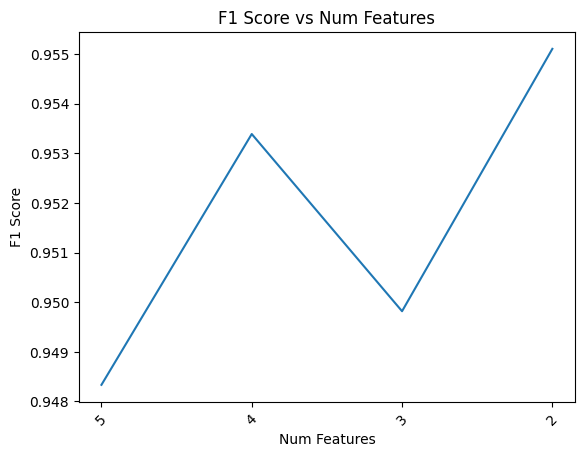

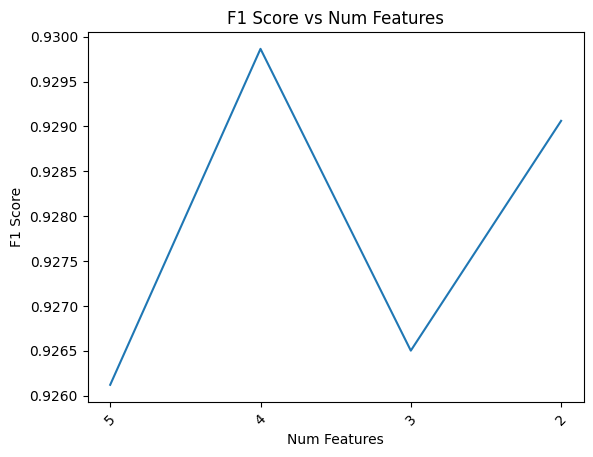

In [17]:
import matplotlib.pyplot as plt

for res in rfe_res:
    fig = plt.plot(res["step"], res["f1score"])
    plt.title("F1 Score vs Num Features")
    plt.xlabel("Num Features")
    plt.xticks(np.arange(len(res)), np.arange(len(res))[::-1] + 2, rotation=45)
    plt.ylabel("F1 Score")
    plt.show()

### AutoEncoder

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from loguru import logger
import time
from tqdm import tqdm


class AutoEncoder(nn.Module):
    def __init__(self, input_size: int = 72, projection: int = 72):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, projection),
        )
        self.decoder = nn.Sequential(
            nn.Linear(projection, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def project(self, x):
        return self.encoder(x)


class AutoEncoderTrainer:
    def __init__(
        self,
        input_size: int,
        projection_dim: int,
        epochs: int = 100,
        batch_size: int = 32,
        device: str = "cpu",
        min_max_scale: bool = True,
        log_every: int = 1,
    ):
        self.epochs = epochs
        self.batch_size = batch_size
        self.device = torch.device(device)
        self.log_every = log_every
        self.min_max_scale = min_max_scale
        self.projection_dim = projection_dim
        self.input_size = input_size
        self.model = None

    def before_train(self):
        logger.info("Before Training")
        self.model = AutoEncoder(
            input_size=self.input_size, projection=self.projection_dim
        ).to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3)
        self.loss_fn = nn.MSELoss()
        self.metrics = {
            "train_loss": [],
            "test_loss": [],
            "train_time": [],
            "epoch": [],
        }

    def train(self, train_features: pd.DataFrame, test_features: pd.DataFrame):
        self.before_train()
        logger.info("Starting Training")
        X_train = torch.tensor(train_features.values, dtype=torch.float32)
        X_test = torch.tensor(test_features.values, dtype=torch.float32)

        if self.min_max_scale:
            self.scaler = MinMaxScaler()
            X_train = self.scaler.fit_transform(X_train)
            X_test = self.scaler.transform(X_test)
            X_train = torch.tensor(X_train, dtype=torch.float32)
            X_test = torch.tensor(X_test, dtype=torch.float32)

        X_train = X_train.to(self.device)
        X_test = X_test.to(self.device)

        train_loader = DataLoader(
            TensorDataset(X_train), batch_size=self.batch_size, shuffle=True
        )
        test_loader = DataLoader(
            TensorDataset(X_test), batch_size=self.batch_size, shuffle=False
        )

        logger.info(f"Training on {self.device}")
        self.model = self.model.to(self.device)

        for epoch in range(self.epochs):
            self.model.train()
            epoch_loss = 0.0
            start_time = time.time()

            with tqdm(
                train_loader, desc=f"Epoch {epoch+1}/{self.epochs} [Train]"
            ) as pbar:
                for (batch,) in pbar:
                    batch = batch.to(self.device)
                    self.optimizer.zero_grad()
                    outputs = self.model(batch)
                    loss = self.loss_fn(outputs, batch)
                    loss.backward()
                    self.optimizer.step()
                    epoch_loss += loss.item()
                    pbar.set_postfix(loss=loss.item())

            avg_train_loss = epoch_loss / len(train_loader)
            end_time = time.time()

            self.model.eval()
            test_loss = 0.0
            with torch.no_grad():
                with tqdm(
                    test_loader, desc=f"Epoch {epoch+1}/{self.epochs} [Test]"
                ) as pbar:
                    for (batch,) in pbar:
                        batch = batch.to(self.device)
                        outputs = self.model(batch)
                        loss = self.loss_fn(outputs, batch)
                        test_loss += loss.item()
                        pbar.set_postfix(loss=loss.item())

            avg_test_loss = test_loss / len(test_loader)

            self.metrics["train_loss"].append(avg_train_loss)
            self.metrics["test_loss"].append(avg_test_loss)
            self.metrics["train_time"].append(end_time - start_time)
            self.metrics["epoch"].append(epoch)

            if epoch % self.log_every == 0:
                logger.info(
                    f"Epoch {epoch}: Train Loss = {avg_train_loss:.4f}, Test Loss = {avg_test_loss:.4f}"
                )

        return self.metrics

    def project(self, data: pd.DataFrame):
        if self.min_max_scale:
            data = self.scaler.transform(data)
            data = torch.tensor(data, dtype=torch.float32)
        self.model.eval()
        with torch.no_grad():
            X = data.to(self.device)
            encoded = self.model.project(X).cpu().numpy()
        return encoded


for df in [dnp3_df, numerical_df]:
    features_df = df.drop(columns=["Label"])
    labels_df = df["Label"]
    train_features_df, test_features, train_labels_df, test_labels = train_test_split(
        features_df,
        labels_df,
        test_size=0.2,
        random_state=42,
        stratify=labels_df,
    )
    trainer = AutoEncoderTrainer(
        input_size=features_df.shape[1],
        projection_dim=features_df.shape[1] // 2,
        epochs=5,
        batch_size=32,
        device="cuda" if torch.cuda.is_available() else "cpu",
        min_max_scale=True,
        log_every=10,
    )

    trainer.train(train_features=features_df, test_features=test_features)

2025-05-18 13:13:02.765 | INFO     | __main__:before_train:59 - Before Training
2025-05-18 13:13:02.772 | INFO     | __main__:train:74 - Starting Training
2025-05-18 13:13:02.872 | INFO     | __main__:train:95 - Training on cuda
Epoch 1/5 [Test]: 100%|██████████| 253/253 [00:00<00:00, 388.04it/s, loss=0.000488]
2025-05-18 13:13:09.822 | INFO     | __main__:train:140 - Epoch 0: Train Loss = 0.0039, Test Loss = 0.0005
Epoch 5/5 [Test]: 100%|██████████| 253/253 [00:00<00:00, 269.44it/s, loss=0.000151]
2025-05-18 13:13:41.811 | INFO     | __main__:before_train:59 - Before Training
2025-05-18 13:13:41.816 | INFO     | __main__:train:74 - Starting Training
2025-05-18 13:13:41.899 | INFO     | __main__:train:95 - Training on cuda
Epoch 1/5 [Test]: 100%|██████████| 262/262 [00:00<00:00, 276.66it/s, loss=0.0016]  
2025-05-18 13:13:50.949 | INFO     | __main__:train:140 - Epoch 0: Train Loss = 0.0027, Test Loss = 0.0002
Epoch 5/5 [Test]: 100%|██████████| 262/262 [00:01<00:00, 251.44it/s, loss=0.

### PCA

In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from loguru import logger
import time
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


class PCAProjector:
    def __init__(self, n_components: int = None, scale: bool = True):
        """
        PCA wrapper with optional MinMax scaling.

        Args:
            n_components (int): Number of PCA components.
            scale (bool): Whether to apply MinMax scaling before PCA.
        """
        self.n_components = n_components
        self.scale = scale

    def before_fit(self):
        logger.info("Before PCA Fit")
        if self.n_components is None:
            raise ValueError("Number of components must be set before fitting PCA.")
        if self.scale:
            logger.info("Scaling data with MinMaxScaler")
        else:
            logger.info("No scaling applied")
        self.pca = PCA(n_components=self.n_components)
        self.metrics = {
            "explained_variance_ratio": [],
            "fit_time": None,
            "n_components": self.n_components,
        }
        self.scaler = MinMaxScaler() if self.scale else None

    def fit_transform(self, train_features: pd.DataFrame):
        self.before_fit()
        logger.info(
            f"Starting PCA with {self.n_components} components. Scaling: {self.scale}"
        )
        X_train = train_features.values

        if self.scale:
            X_train = self.scaler.fit_transform(X_train)

        t_start = time.perf_counter()
        X_train_pca = self.pca.fit_transform(X_train)
        t_end = time.perf_counter()

        self.metrics["fit_time"] = t_end - t_start
        self.metrics["explained_variance_ratio"] = (
            self.pca.explained_variance_ratio_.tolist()
        )

        logger.info(f"PCA completed in {self.metrics['fit_time']:.4f}s")
        # logger.info(
        #     f"Explained variance (first {self.n_components} components): {self.metrics['explained_variance_ratio']}"
        # )

        return X_train_pca

    def project(self, data: pd.DataFrame):
        """
        Project data using the fitted PCA model.

        Args:
            data (pd.DataFrame): Data to project.

        Returns:
            np.ndarray: Projected data.
        """
        if self.scale:
            data = self.scaler.transform(data)
        return self.pca.transform(data)


projector = PCAProjector(n_components=72, scale=True)
projector.fit_transform(features_df)

train_projected = projector.project(features_df)
test_projected = projector.project(test_features)

2025-05-18 13:15:10.153 | INFO     | __main__:before_fit:25 - Before PCA Fit
2025-05-18 13:15:10.154 | INFO     | __main__:before_fit:29 - Scaling data with MinMaxScaler
2025-05-18 13:15:10.154 | INFO     | __main__:fit_transform:42 - Starting PCA with 72 components. Scaling: True
2025-05-18 13:15:10.765 | INFO     | __main__:fit_transform:61 - PCA completed in 0.5548s


### RFE

In [22]:
class RFE:
    def __init__(
        self,
        model_cls,
        train_features: pd.DataFrame,
        train_labels: pd.Series,
        test_features: pd.DataFrame,
        test_labels: pd.Series,
        num_steps: int = 72,
        stopping_score: float = 0.5,
    ):
        self.model_cls = model_cls
        self.train_features = train_features
        self.train_labels = train_labels
        self.test_features = test_features
        self.test_labels = test_labels
        self.num_steps = num_steps
        self.stopping_score = stopping_score
        self.result = []
        self.curr_step = 0
        self.feature_mask = None

        self.orig_feature_names = train_features.columns.tolist()

        self.scaler = MinMaxScaler()
        self.scaler.fit(self.train_features)
        self.train_features = self.scaler.transform(self.train_features)
        self.test_features = self.scaler.transform(self.test_features)

    def fit(self, feature_names: list | None = None):
        if feature_names is None:
            feature_names = self.orig_feature_names
        # init feat mask
        feature_mask = np.array([f in feature_names for f in self.orig_feature_names])
        t_start = time.perf_counter()
        x_train_sel = self.train_features[:, feature_mask]
        x_test_sel = self.test_features[:, feature_mask]
        current_indices = np.flatnonzero(feature_mask)
        current_feature_names = [self.orig_feature_names[i] for i in current_indices]
        logger.info(f"Current feature shape: {x_train_sel.shape}")
        # Train model
        model = self.model_cls()
        t0 = time.perf_counter()
        model.fit(x_train_sel, self.train_labels)
        logger.info(f"Training time: {time.perf_counter() - t0:.4f}s")
        # Evaluate
        score = model.score(x_test_sel, self.test_labels)
        logger.info(f"Score: {score:.4f}")
        importances = model.feature_importances_
        max_i = importances.argmax()
        min_i = importances.argmin()
        logger.info(
            f"Max importance: {importances[max_i]:.4f} ({current_feature_names[max_i]})"
        )
        logger.info(
            f"Min importance: {importances[min_i]:.4f} ({current_feature_names[min_i]})"
        )
        # Stopping criteria
        if score < self.stopping_score:
            logger.info(
                f"Score dropped below stopping threshold of {self.stopping_score}"
            )
            return
        if self.curr_step >= self.num_steps - 1:
            logger.info(f"Reached max number of steps: {self.num_steps}")
            return
        if feature_mask.sum() == 1:
            logger.info("Only one feature left, stopping")
            return
        # Eliminate least important feature
        remove_global_idx = current_indices[min_i]
        removed_feature_name = self.orig_feature_names[remove_global_idx]
        feature_mask[remove_global_idx] = False
        self.result.append(
            [
                self.curr_step,
                removed_feature_name,
                current_feature_names[max_i],
                current_feature_names[min_i],
                importances[max_i],
                importances[min_i],
                score,
                x_test_sel.shape[1],
            ]
        )
        logger.info(f"Removed feature: {removed_feature_name}")
        self.curr_step += 1
        logger.info(f"Total time: {time.perf_counter() - t_start:.4f}s")
        self.current_feature_names = [
            self.orig_feature_names[i] for i in np.flatnonzero(feature_mask)
        ]
        self.feature_mask = feature_mask
        return self.result, self.current_feature_names

    def project(self, data: pd.DataFrame):
        if self.scaler is not None:
            data = self.scaler.transform(data)

        data = data[:, self.feature_mask]

        return data


rfe = RFE(
    RandomForestClassifier,
    features_df,
    labels_df,
    test_features,
    test_labels,
    num_steps=5,
)
res, feat_names = rfe.fit()

2025-05-18 13:15:53.406 | INFO     | __main__:fit:40 - Current feature shape: (41768, 75)
2025-05-18 13:16:03.721 | INFO     | __main__:fit:45 - Training time: 10.3130s
2025-05-18 13:16:03.866 | INFO     | __main__:fit:48 - Score: 1.0000
2025-05-18 13:16:03.879 | INFO     | __main__:fit:52 - Max importance: 0.1074 (Src Port)
2025-05-18 13:16:03.880 | INFO     | __main__:fit:55 - Min importance: 0.0000 (Fwd URG Flags)
2025-05-18 13:16:03.881 | INFO     | __main__:fit:86 - Removed feature: Fwd URG Flags
2025-05-18 13:16:03.881 | INFO     | __main__:fit:88 - Total time: 10.4840s


### All in One

In [47]:
results = []
max_steps = -2
epochs = 50
for df in [dnp3_df, numerical_df]:
    # df = df.sample(1000)
    df = oversample_class(df, "Label")
    features_df = df.drop(columns=["Label"])
    labels_df = df["Label"]
    train_features_df, test_features, train_labels_df, test_labels = train_test_split(
        features_df,
        labels_df,
        test_size=0.25,
        random_state=42,
        stratify=labels_df,
    )
    num_features = len(features_df.columns)
    rfe = RFE(
        RandomForestClassifier, features_df, labels_df, test_features, test_labels
    )
    pca_projector = PCAProjector(n_components=num_features, scale=True)
    ae_trainer = AutoEncoderTrainer(
        input_size=num_features, projection_dim=num_features, epochs=epochs
    )
    selected_features = features_df.columns.tolist()
    experiment_results = {
        "rfe_acc": [],
        "pca_acc": [],
        "ae_acc": [],
        "rfe_f1": [],
        "pca_f1": [],
        "ae_f1": [],
    }
    for step in range(1, len(selected_features) + 1):
        if step > max_steps and max_steps > 0:
            break
        logger.info(f"\nRunning Step {step}")
        curr_num_features = num_features - step
        if curr_num_features <= 1:
            break

        # train
        ae_trainer.projection_dim = curr_num_features
        pca_projector.n_components = curr_num_features
        res, selected_features = rfe.fit(feature_names=selected_features)
        pca_projector.fit_transform(features_df)
        ae_trainer.train(
            train_features=features_df,
            test_features=test_features,
        )
        # projection
        rfe_train = rfe.project(features_df)
        rfe_test = rfe.project(test_features)
        pca_train = pca_projector.project(features_df)
        pca_test = pca_projector.project(test_features)
        ae_train = ae_trainer.project(features_df)
        ae_test = ae_trainer.project(test_features)

        assert rfe_train.shape[1] == pca_train.shape[1] == ae_train.shape[1]
        assert rfe_test.shape[1] == pca_test.shape[1] == ae_test.shape[1]

        # train model
        model = RandomForestClassifier()
        model.fit(rfe_train, labels_df)
        rfe_score = model.score(rfe_test, test_labels)
        f1 = f1_score(test_labels, model.predict(rfe_test), average="weighted")
        experiment_results["rfe_acc"].append(rfe_score)
        experiment_results["rfe_f1"].append(f1)
        logger.info(
            f"Step {step}: Feature Shape: {rfe_train.shape}, RFE Score = {rfe_score:.4f}, F1 Score = {f1:.4f}"
        )

        model = RandomForestClassifier()
        model.fit(pca_train, labels_df)
        pca_score = model.score(pca_test, test_labels)
        f1 = f1_score(test_labels, model.predict(pca_test), average="weighted")
        experiment_results["pca_acc"].append(pca_score)
        experiment_results["pca_f1"].append(f1)

        logger.info(
            f"Step {step}: Feature Shape: {pca_train.shape}, PCA Score = {pca_score:.4f}, F1 Score = {f1:.4f}"
        )

        model = RandomForestClassifier()
        model.fit(ae_train, labels_df)
        ae_score = model.score(ae_test, test_labels)
        f1 = f1_score(test_labels, model.predict(ae_test), average="weighted")
        experiment_results["ae_acc"].append(ae_score)
        experiment_results["ae_f1"].append(f1)

        logger.info(
            f"Step {step}: Feature Shape: {ae_train.shape}, AE Score = {ae_score:.4f}, F1 Score = {f1:.4f}"
        )
        logger.info(
            f"Step {step}: Feature Shape: {rfe_train.shape}, RFE F1 Score = {f1:.4f}, PCA F1 Score = {f1:.4f}, AE F1 Score = {f1:.4f}"
        )

    res_df = pd.DataFrame(
        experiment_results,
        index=[i for i in range(len(experiment_results["rfe_acc"]))],
    )
    results.append(res_df)

2025-05-18 17:46:02.469 | INFO     | __main__:oversample_class:5 - Before oversampling: Label
NORMAL                 14380
DISABLE_UNSOLICITED     5760
COLD_RESTART            5760
WARM_RESTART            5760
DNP3_ENUMERATE          3380
DNP3_INFO               3342
INIT_DATA                692
STOP_APP                 680
REPLAY                   666
Name: count, dtype: int64
2025-05-18 17:46:02.473 | INFO     | __main__:oversample_class:12 - Label DISABLE_UNSOLICITED needs 8620 samples


2025-05-18 17:46:02.498 | INFO     | __main__:oversample_class:12 - Label COLD_RESTART needs 8620 samples
2025-05-18 17:46:02.524 | INFO     | __main__:oversample_class:12 - Label WARM_RESTART needs 8620 samples
2025-05-18 17:46:02.561 | INFO     | __main__:oversample_class:12 - Label DNP3_ENUMERATE needs 11000 samples
2025-05-18 17:46:02.599 | INFO     | __main__:oversample_class:12 - Label DNP3_INFO needs 11038 samples
2025-05-18 17:46:02.637 | INFO     | __main__:oversample_class:12 - Label INIT_DATA needs 13688 samples
2025-05-18 17:46:02.681 | INFO     | __main__:oversample_class:12 - Label STOP_APP needs 13700 samples
2025-05-18 17:46:02.729 | INFO     | __main__:oversample_class:12 - Label REPLAY needs 13714 samples
2025-05-18 17:46:03.048 | INFO     | __main__:oversample_class:18 - After oversampling: Label
DISABLE_UNSOLICITED    14380
STOP_APP               14380
DNP3_ENUMERATE         14380
WARM_RESTART           14380
COLD_RESTART           14380
REPLAY                 14380

KeyboardInterrupt: 

rfe_acc    1.0
pca_acc    1.0
ae_acc     1.0
rfe_f1     1.0
pca_f1     1.0
ae_f1      1.0
dtype: float64


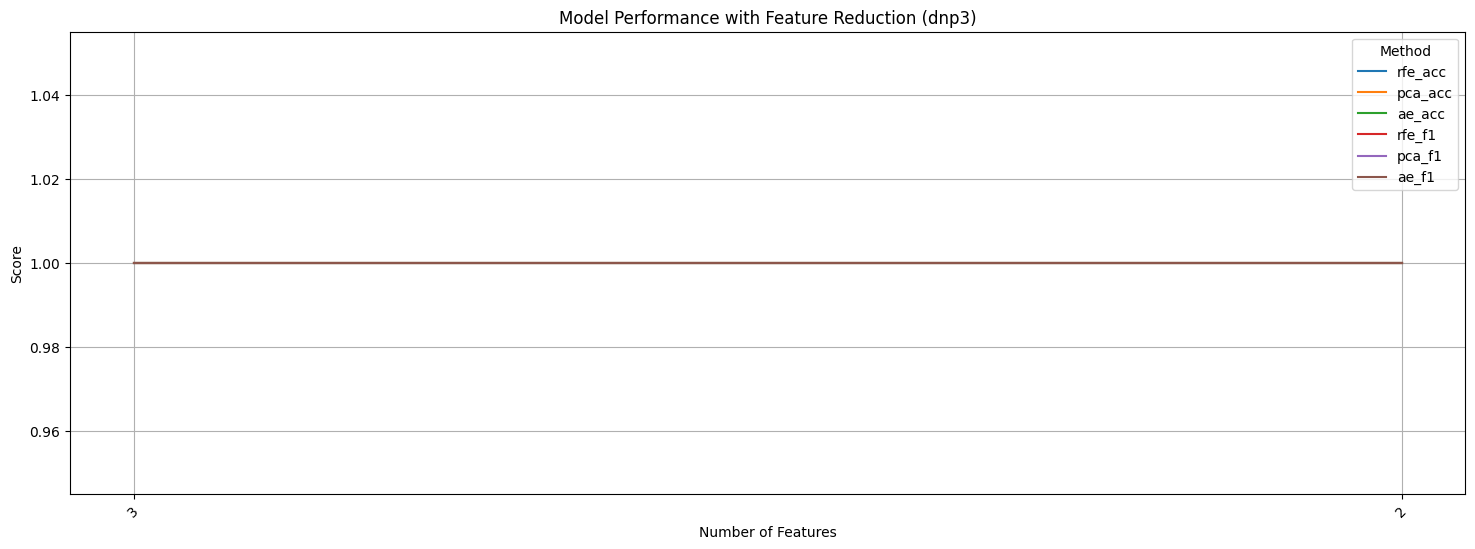

rfe_acc    1.0
pca_acc    1.0
ae_acc     1.0
rfe_f1     1.0
pca_f1     1.0
ae_f1      1.0
dtype: float64


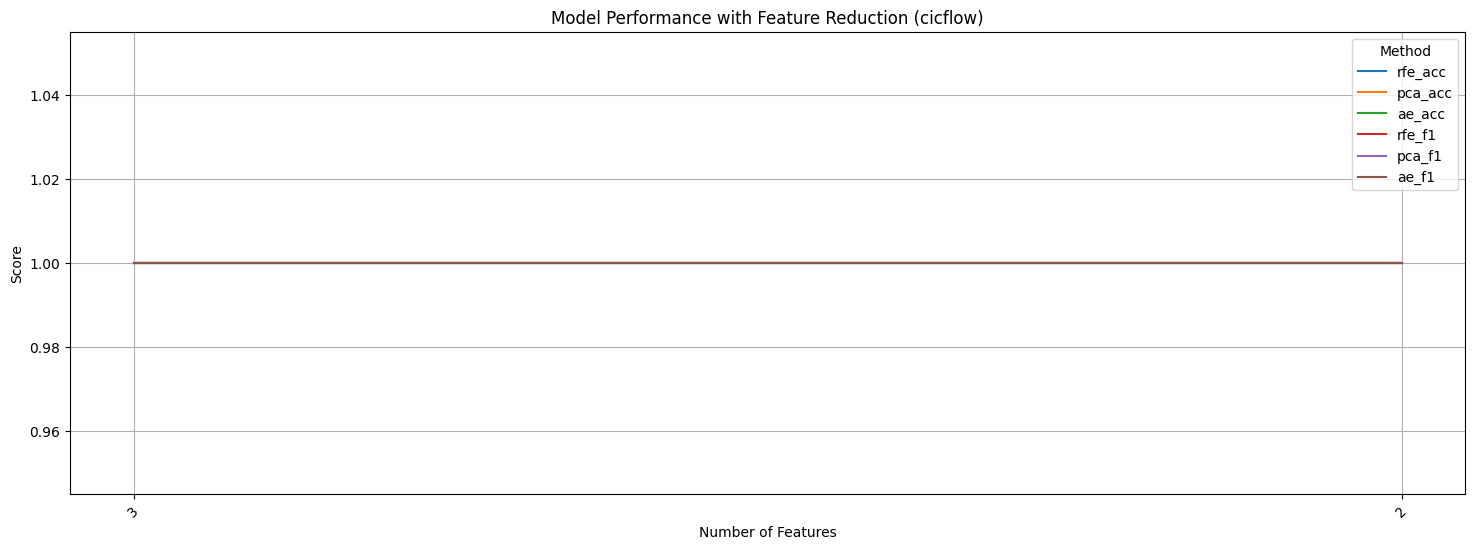

In [43]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_types = ["dnp3", "cicflow"]
for i, res_df in enumerate(results):
    print(res_df.max())
    plt.figure(figsize=(18, 6))
    sns.lineplot(data=res_df, dashes=False)
    plt.title("Model Performance with Feature Reduction" + f" ({data_types[i]})")
    plt.xlabel("Number of Features")
    plt.ylabel("Score")
    plt.xticks(np.arange(len(res_df)), np.arange(len(res_df))[::-1] + 2, rotation=45)
    plt.legend(title="Method")
    plt.grid()
    plt.show()

## Visualize results

In [94]:
root = Path(r"E:\MSc Works\IDS")
res_name = ["results_dnp3_pca.csv", "results_dnp3_rfe.csv", "results_dnp3_ae.csv"]

all_res = []
for i, res_df in enumerate(res_name):
    df = pd.read_csv(root / res_df)
    print(df.shape)
    dataset = res_df.split("_")[1]
    df["dataset"] = dataset
    df["method"] = res_df.split("_")[2].split(".")[0]
    df["step"] = np.arange(len(df))
    all_res.append(df)

all_res = pd.concat(all_res, ignore_index=True)

(94, 3)
(94, 3)
(94, 3)


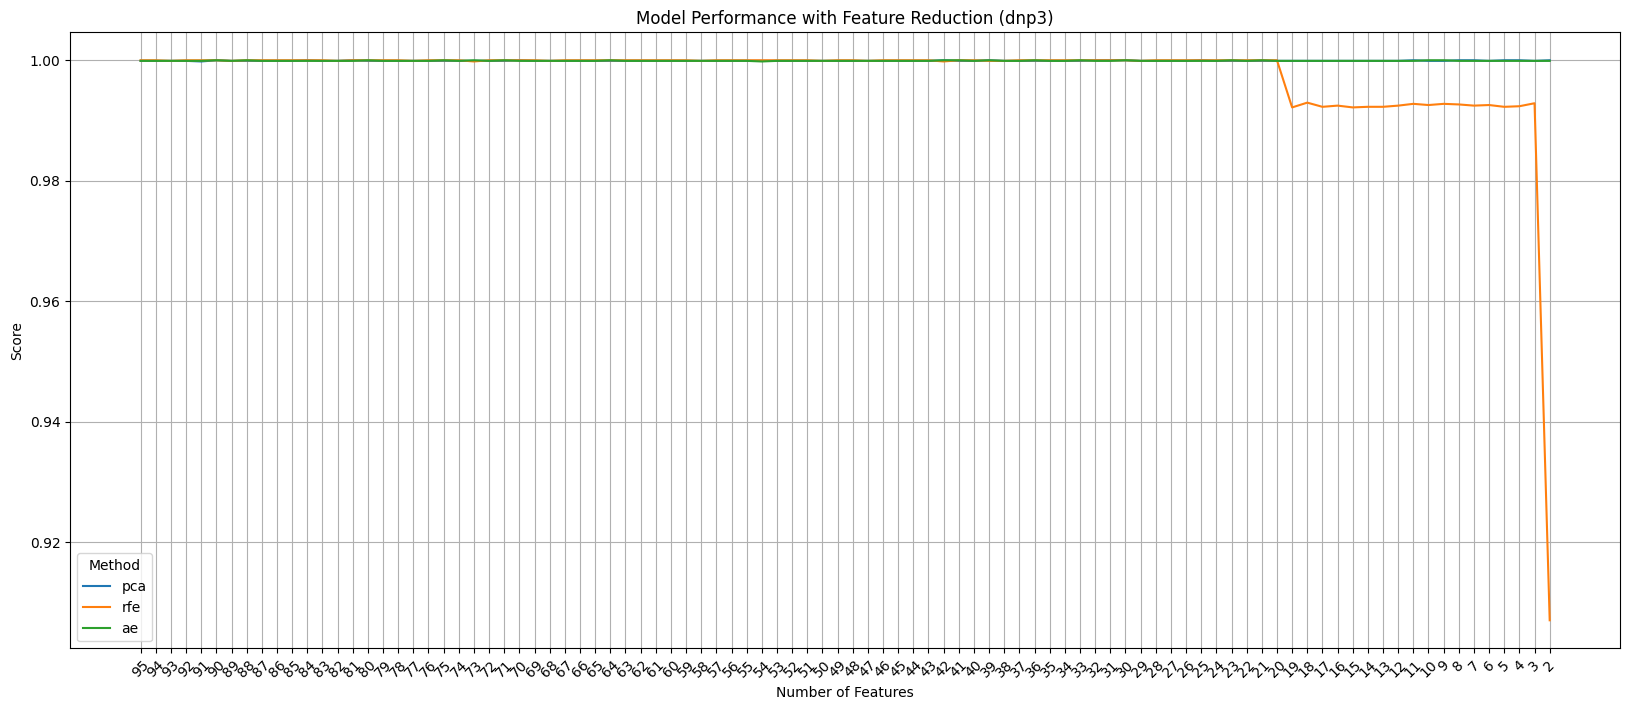

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

for ds in all_res.dataset.unique():
    plt.figure(figsize=(20, 8))
    for method in all_res.method.unique():
        df = all_res.query(f"dataset == '{ds}' and method == '{method}'")
        sns.lineplot(data=df, x="step", y="f1", label=method, dashes=False)
    plt.title(f"Model Performance with Feature Reduction ({ds})")
    plt.xlabel("Number of Features")
    plt.ylabel("Score")
    plt.xticks(np.arange(len(df)), np.arange(len(df))[::-1] + 2, rotation=45)
    plt.legend(title="Method")
    plt.grid()
    plt.show()